In [2]:
from Trashbin import LabelGeneration, TeacherNet
from utils import sbm_dataset, communityPassing
import pathpyG as pp
import torch

root= r"C:\Users\david\PythonProjekte\Bachelor\TestGraph"

dataset = sbm_dataset.StochasticBlockModelDataset(
    root=root,
    block_sizes=[20, 20, 20],      
    edge_probs=[
        [0.20, 0.02, 0.02],
        [0.02, 0.20, 0.02],
        [0.02, 0.02, 0.20],
    ],   
    is_undirected=True,
    num_channels=5
)

ModuleNotFoundError: No module named 'Trashbin'

In [2]:
data = dataset[0]
print(data)
print(data.x)
print(data.get_edge_index)
print(data.y)

Data(x=[60, 5], edge_index=[2, 320], y=[60])
tensor([[-7.1414e-01, -2.3441e+00,  1.2613e+00,  2.1721e+00,  1.3653e-01],
        [-5.5623e-01,  1.1993e+00,  5.3192e-01,  2.2204e+00,  3.0013e-01],
        [-3.9531e+00, -1.3429e+00,  3.0359e+00, -1.0861e-01,  2.7132e+00],
        [-1.2721e+00, -7.4850e-01,  1.6894e+00,  1.5753e+00,  1.1964e+00],
        [-2.3260e+00, -2.6960e+00,  1.6646e+00,  1.1867e+00,  1.2128e+00],
        [-3.1224e+00, -2.6539e+00,  2.7879e+00,  2.3431e-01,  2.3350e+00],
        [ 1.1646e-01,  1.3145e-01,  8.7490e-01,  1.2113e+00,  8.4448e-01],
        [-1.4612e+00, -1.9314e+00,  1.5811e+00,  1.4969e+00,  1.0985e+00],
        [ 9.5892e-01,  6.7349e-01,  3.6764e-01,  2.4848e+00, -3.3061e-01],
        [-1.9077e+00, -3.9594e+00,  2.2972e+00,  7.8866e-01,  1.3290e+00],
        [ 2.5142e+00,  7.2036e-01, -1.1975e+00,  9.7290e-01,  8.6780e-01],
        [-4.7860e-02,  2.0208e+00,  1.8444e+00,  2.7323e+00, -6.9510e-02],
        [ 1.6690e+00, -4.1813e-01,  2.2099e-01,  5.7118

In [ ]:
from Trashbin.LabelGeneration import LabelGeneration

data = dataset[0]

label_gen = LabelGeneration(
    in_channels=data.x.size(1),
    num_classes=5,
    hidden=64,
    temperature=1.0,
    stochastic=False,
    method="labelsampling",
    seed=42,
    device=data.x.device
)

data.labels = label_gen.labels(data)
print(data.labels)


tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 4, 0,
        0, 0, 3, 3, 3, 0, 3, 3, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0,
        0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 4, 3])


In [4]:
from utils.TrainingUtils import TrainingUtils


In [ ]:
from models.communityGCN import CommunityGCN
from Trashbin.LabelGeneration import LabelGeneration

data = dataset[0]

num_classes = 3

label_gen = LabelGeneration(
    in_channels=data.x.size(1),
    num_classes=num_classes,
    hidden=64,
    temperature=1.0,
    stochastic=False,
    method="labelsampling",
    seed=42,
    device=data.x.device
)

data.y_task = label_gen.labels(data)

data.train_mask, data.val_mask, data.test_mask = TrainingUtils.make_splits(
    data.num_nodes,
    train_ratio=0.6,
    val_ratio=0.2,
    seed=123,
    device=data.x.device
)

model = CommunityGCN(
    in_channels=data.x.size(1),
    hidden=64,
    num_classes=num_classes,
    dropout=0.2
)

trained = model.fit(
    data,
    community_attr="y",
    lr=1e-2,
    weight_decay=5e-4,
    epochs=200
)


Epoch 001 | loss 1.1827 | train 0.583 | val 0.167 | test 0.500


Epoch 020 | loss 0.3927 | train 0.889 | val 0.583 | test 0.750
Epoch 040 | loss 0.3124 | train 0.889 | val 0.417 | test 0.833
Epoch 060 | loss 0.2331 | train 0.889 | val 0.333 | test 0.833
Epoch 080 | loss 0.2379 | train 0.889 | val 0.333 | test 0.833
Epoch 100 | loss 0.4076 | train 0.917 | val 0.500 | test 0.667
Epoch 120 | loss 0.1916 | train 0.944 | val 0.417 | test 0.750
Epoch 140 | loss 0.1388 | train 0.944 | val 0.333 | test 0.750
Epoch 160 | loss 0.1781 | train 0.972 | val 0.333 | test 0.667
Epoch 180 | loss 0.1867 | train 0.972 | val 0.333 | test 0.667
Epoch 200 | loss 0.1002 | train 0.972 | val 0.333 | test 0.667
Best checkpoint (val) | train 0.806 | val 0.667 | test 0.750


Schwerer Fall

In [6]:
dataset = sbm_dataset.StochasticBlockModelDataset(
    root=root,
    block_sizes=[80, 80, 80, 80],   
    edge_probs=[
        [0.15, 0.03, 0.02, 0.01],
        [0.03, 0.15, 0.03, 0.02],
        [0.02, 0.03, 0.15, 0.03],
        [0.01, 0.02, 0.03, 0.15],
    ],
    is_undirected=True,
    num_channels=32,             
    force_reload=True
)


Processing...
Done!


In [ ]:
from Trashbin.LabelGeneration import LabelGeneration

data = dataset[0]

num_classes = 6

label_gen = LabelGeneration(
    in_channels=data.x.size(1),
    num_classes=num_classes,
    hidden=64,
    temperature=1.0,
    stochastic=False,
    method="labelsampling",
    seed=42,
    device=data.x.device
)

data.y_task = label_gen.labels(data)
print(data.y_task.bincount())
print(data.y_task)


tensor([53, 19, 93, 57, 48, 50])
tensor([3, 2, 2, 0, 3, 2, 0, 2, 1, 3, 4, 3, 5, 3, 0, 4, 5, 3, 3, 5, 0, 3, 5, 1,
        0, 0, 3, 0, 5, 1, 1, 5, 5, 4, 0, 5, 5, 1, 4, 1, 5, 2, 5, 0, 1, 3, 4, 3,
        1, 2, 2, 1, 0, 1, 2, 5, 2, 2, 2, 5, 1, 3, 2, 2, 0, 4, 2, 5, 5, 0, 3, 2,
        0, 5, 2, 2, 2, 3, 2, 0, 4, 3, 4, 2, 0, 0, 2, 4, 4, 3, 4, 3, 0, 2, 2, 0,
        5, 3, 3, 2, 4, 5, 5, 3, 0, 4, 2, 3, 5, 2, 3, 0, 3, 4, 2, 4, 0, 2, 0, 3,
        0, 2, 4, 0, 2, 3, 4, 4, 4, 4, 3, 0, 3, 0, 0, 0, 5, 2, 2, 3, 4, 5, 3, 3,
        0, 0, 3, 0, 4, 5, 5, 3, 2, 4, 4, 2, 2, 2, 3, 0, 3, 2, 5, 3, 2, 5, 3, 5,
        2, 4, 2, 4, 4, 4, 5, 5, 3, 5, 4, 4, 2, 4, 1, 4, 3, 5, 2, 5, 3, 1, 2, 4,
        4, 2, 0, 4, 2, 4, 2, 3, 3, 2, 3, 5, 2, 3, 1, 3, 2, 4, 2, 4, 2, 3, 4, 1,
        2, 2, 2, 3, 3, 3, 2, 2, 5, 0, 0, 3, 0, 0, 3, 3, 4, 0, 4, 2, 3, 2, 2, 1,
        2, 5, 5, 2, 3, 4, 2, 5, 3, 5, 2, 2, 2, 2, 2, 2, 1, 4, 2, 5, 4, 1, 5, 4,
        0, 0, 5, 0, 2, 0, 0, 5, 0, 2, 2, 2, 3, 2, 1, 2, 0, 2, 0, 5, 5, 2, 2, 0,
       

In [ ]:
data.train_mask, data.val_mask, data.test_mask = TrainingUtils.make_splits(
    data.num_nodes,
    train_ratio=0.6,
    val_ratio=0.2,
    seed=123,
    device=data.x.device
)

In [9]:
from models.communityGCN import CommunityGCN

model = CommunityGCN(
    in_channels=data.x.size(1),
    hidden=128,
    num_classes=num_classes,
    dropout=0.35
)


In [10]:
trained = model.fit(
    data,
    community_attr="y",
    lr=3e-3,
    weight_decay=1e-3,
    epochs=400
)


Epoch 001 | loss 2.0536 | train 0.297 | val 0.250 | test 0.312
Epoch 020 | loss 1.5865 | train 0.359 | val 0.281 | test 0.312
Epoch 040 | loss 1.4569 | train 0.521 | val 0.344 | test 0.297
Epoch 060 | loss 1.2769 | train 0.547 | val 0.469 | test 0.312
Epoch 080 | loss 1.1404 | train 0.573 | val 0.469 | test 0.375
Epoch 100 | loss 1.0070 | train 0.661 | val 0.375 | test 0.344
Epoch 120 | loss 0.9753 | train 0.589 | val 0.375 | test 0.359
Epoch 140 | loss 0.9213 | train 0.693 | val 0.422 | test 0.328
Epoch 160 | loss 0.8891 | train 0.708 | val 0.375 | test 0.391
Epoch 180 | loss 0.8094 | train 0.792 | val 0.484 | test 0.312
Epoch 200 | loss 0.7717 | train 0.766 | val 0.453 | test 0.297
Epoch 220 | loss 0.7672 | train 0.750 | val 0.422 | test 0.344
Epoch 240 | loss 0.8563 | train 0.771 | val 0.469 | test 0.312
Epoch 260 | loss 0.8257 | train 0.833 | val 0.453 | test 0.359
Epoch 280 | loss 0.7536 | train 0.839 | val 0.422 | test 0.344
Epoch 300 | loss 0.6815 | train 0.849 | val 0.438 | tes

Compare with Vanilla GCN 

In [11]:
from models.GCN import GCN

model = GCN(
    in_channels=data.x.size(1),
    hidden=128,
    num_classes=num_classes,
    dropout=0.35,
)

trained = model.fit(
    data,
    lr=3e-3,
    weight_decay=1e-3,
    epochs=400
)


Epoch 001 | loss 1.8507 | train 0.146 | val 0.281 | test 0.156
Epoch 020 | loss 1.4504 | train 0.432 | val 0.422 | test 0.281
Epoch 040 | loss 1.1804 | train 0.620 | val 0.438 | test 0.328
Epoch 060 | loss 1.0030 | train 0.688 | val 0.516 | test 0.344
Epoch 080 | loss 0.8746 | train 0.703 | val 0.484 | test 0.406
Epoch 100 | loss 0.7810 | train 0.771 | val 0.406 | test 0.391
Epoch 120 | loss 0.6930 | train 0.823 | val 0.422 | test 0.406
Epoch 140 | loss 0.6445 | train 0.849 | val 0.422 | test 0.422
Epoch 160 | loss 0.5566 | train 0.885 | val 0.422 | test 0.406
Epoch 180 | loss 0.5158 | train 0.891 | val 0.422 | test 0.391
Epoch 200 | loss 0.4978 | train 0.906 | val 0.406 | test 0.406
Epoch 220 | loss 0.4805 | train 0.922 | val 0.406 | test 0.406
Epoch 240 | loss 0.4322 | train 0.943 | val 0.438 | test 0.391
Epoch 260 | loss 0.4385 | train 0.953 | val 0.422 | test 0.406
Epoch 280 | loss 0.3912 | train 0.964 | val 0.406 | test 0.391
Epoch 300 | loss 0.3766 | train 0.969 | val 0.375 | tes

trial 001 | lr 5e-05 | hidden 8 | dropout 0 | wd 5e-05 | test 0.219
trial 002 | lr 5e-05 | hidden 8 | dropout 0 | wd 0.0005 | test 0.156
trial 003 | lr 5e-05 | hidden 8 | dropout 0 | wd 0 | test 0.156
trial 004 | lr 5e-05 | hidden 8 | dropout 0.1 | wd 5e-05 | test 0.234
trial 005 | lr 5e-05 | hidden 8 | dropout 0.1 | wd 0.0005 | test 0.172
trial 006 | lr 5e-05 | hidden 8 | dropout 0.1 | wd 0 | test 0.125
trial 007 | lr 5e-05 | hidden 8 | dropout 0.2 | wd 5e-05 | test 0.250
trial 008 | lr 5e-05 | hidden 8 | dropout 0.2 | wd 0.0005 | test 0.281
trial 009 | lr 5e-05 | hidden 8 | dropout 0.2 | wd 0 | test 0.266
trial 010 | lr 5e-05 | hidden 8 | dropout 0.3 | wd 5e-05 | test 0.312
trial 011 | lr 5e-05 | hidden 8 | dropout 0.3 | wd 0.0005 | test 0.172
trial 012 | lr 5e-05 | hidden 8 | dropout 0.3 | wd 0 | test 0.094
trial 013 | lr 5e-05 | hidden 8 | dropout 0.5 | wd 5e-05 | test 0.188
trial 014 | lr 5e-05 | hidden 8 | dropout 0.5 | wd 0.0005 | test 0.125
trial 015 | lr 5e-05 | hidden 8 | dro

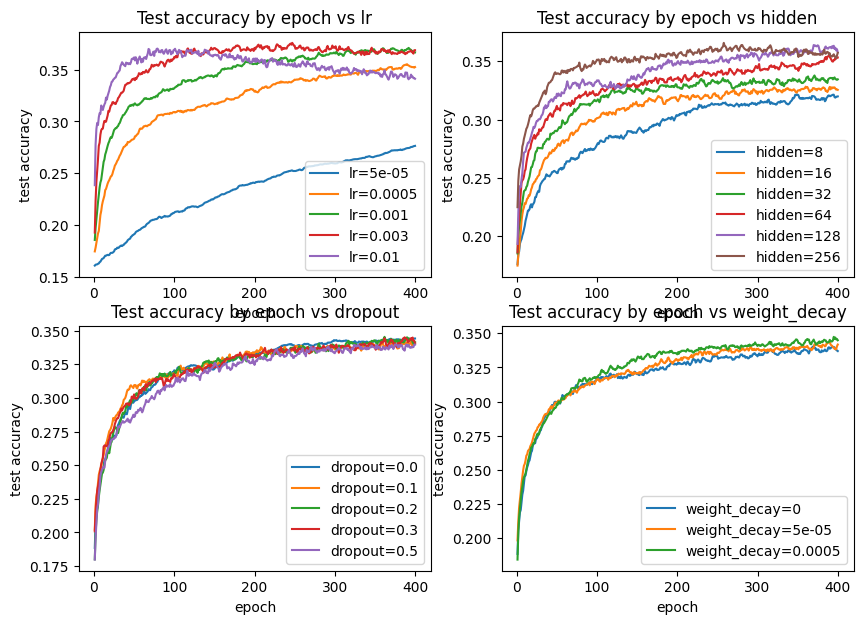

{'lr': 0.003, 'hidden': 32, 'dropout': 0.1, 'weight_decay': 0, 'epochs': 400} 0.5


In [ ]:
from Trashbin.HyperparameterOptimizer import HyperparameterOptimizer

opt = HyperparameterOptimizer(seed=42)
result = opt.optimize_gcn(
    data,
    num_classes=num_classes,
    lrs=(5e-5, 5e-4, 1e-3, 3e-3, 1e-2),
    hidden_sizes=(8, 16, 32, 64, 128, 256),
    dropouts=(0.0, 0.1, 0.2, 0.3, 0.5),
    weight_decays=(5e-5, 5e-4, 0),
    epochs=400,
    print_every=0,
    plot=True,
    plot_focus="all",
)

print(result["config"], result["test_acc"])
best_model = result["model"]


Wow that is not training at all, data might not have correlation between features and labels 